In [58]:
import cv2

import matplotlib.pyplot as plt
from numpy import uint8, ones, array, fft, log; abs
from os import listdir
from os.path import isfile, join
path = '../DATA/ALL/'
files = [path+f for f in listdir(path) if isfile(join(path, f))]
cv2.__version__
print(files[1])

../DATA/ALL/GO-001


# Display image and keypoints of the image

480 640


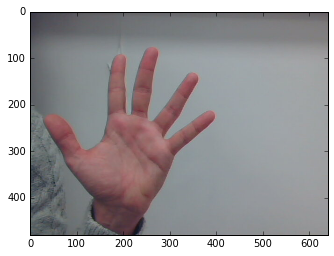

In [59]:
img_bgr= cv2.imread(files[1])
h,w =img_bgr.shape[:2]
print(h,w)

img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### Filter

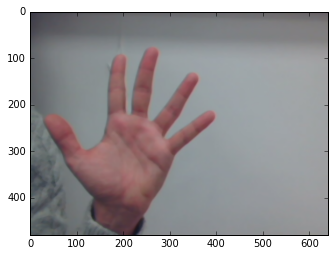

In [60]:
img_filtered = cv2.GaussianBlur(img_rgb,(7,7),0)
img_filtered = cv2.medianBlur(img_filtered, 5)
plt.imshow(img_filtered)
plt.show()

# kps: 85, descriptors: (85, 128)


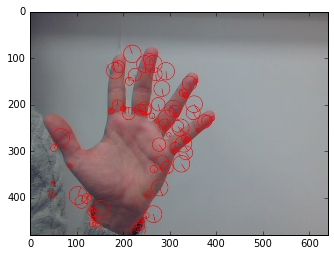

In [61]:


#convert to grayscale
gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)


# Blur an image 
blur=cv2.GaussianBlur(img_rgb,(0,0),5)

#detect feature points
kaze = cv2.KAZE_create(200)
(kps, descs) = kaze.detectAndCompute(img_rgb, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
mask=uint8(ones(gray.shape))
keypoints=kaze.detect(gray,mask)

#show image and points
for k in keypoints[::10]:
    cv2.circle(img_bgr,(int(k.pt[0]),int(k.pt[1])),2,(0,255,0),-1)
    cv2.circle(img_bgr,(int(k.pt[0]),int(k.pt[1])),int(k.size),(0,255,0),2)
img2 = cv2.drawKeypoints(img_rgb,kps,None,(255,0,0),4)

plt.imshow(img2)
plt.show()


# Equalize histogram

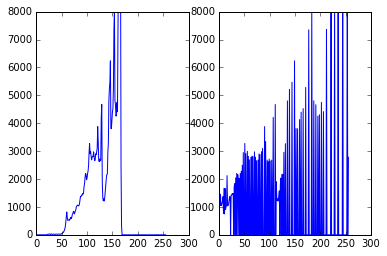

In [62]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.subplot(1,2,1).plot(hist)
plt.ylim(1, 8000)



gray_egalized =  cv2.equalizeHist(gray)
hist_egalized = cv2.calcHist([gray_egalized], [0], None, [256], [0, 256])
plt.subplot(1,2,2).plot(hist_egalized)
plt.ylim(1, 8000)
plt.show()

# Display the FFT 

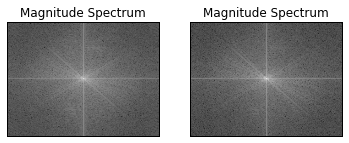

In [63]:
f = fft.fft2(gray)
fshift = fft.fftshift(f)
magnitude_spectrum = 20*log(abs(fshift))
plt.subplot(1,2,1).imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

f = fft.fft2(gray_egalized)
fshift = fft.fftshift(f)
magnitude_spectrum = 20*log(abs(fshift))
plt.subplot(1,2,2).imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Find the contour of the hand 

#### Test contours

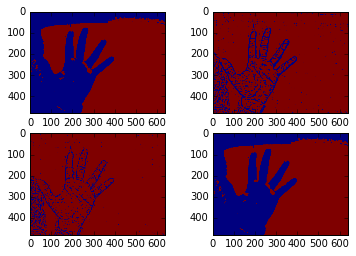

In [64]:
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.subplot(2,2,1).imshow(thresh)

th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.subplot(2,2,2).imshow(th2)

th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.subplot(2,2,3).imshow(th3)

ret4,th4 = cv2.threshold(gray,0,200,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(2,2,4).imshow(th4)
plt.show()

#### FInd the correct contour

In [65]:

im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)


hand_contour = None
max_area = 0
max_perimeter = 0
for cnt in contours:
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    if (area > max_area) and (perimeter > max_perimeter):
        max_area = area
        hand_contour = cnt
    hull = cv2.convexHull(hand_contour)
                                 
img_contour = cv2.drawContours(gray, hull, -1, (0,255,0), 3)

plt.imshow(img_contour)
plt.show()

error: /io/opencv/modules/imgproc/src/convhull.cpp:136: error: (-215) total >= 0 && (depth == CV_32F || depth == CV_32S) in function convexHull


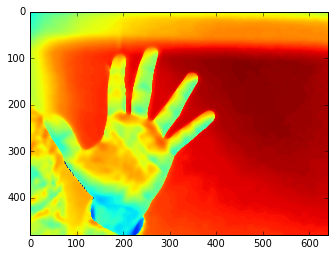

In [67]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edges = cv2.Canny(gray, 100, 255)

_, cnts , _= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
screenCnt = None
img_contour_edges = cv2.drawContours(gray, cnts[1], -1, (0,255,0), 1)
        
plt.imshow(img_contour_edges)
plt.show()

# Bin & tests

In [48]:
help(cv2.arcLength)

Help on built-in function arcLength:

arcLength(...)
    arcLength(curve, closed) -> retval
    .   @brief Calculates a contour perimeter or a curve length.
    .   
    .   The function computes a curve length or a closed contour perimeter.
    .   
    .   @param curve Input vector of 2D points, stored in std::vector or Mat.
    .   @param closed Flag indicating whether the curve is closed or not.



In [49]:
# import the necessary packages
import sys
sys.path.append('pyimagesearch/shapedetector')
sys.path.append('pyimagesearch/colorlabeler')

#import pyimagesearch.shapedetector
#from pyimagesearch.colorlabeler import ColorLabeler
import imutils
import cv2


# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(files[0])
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# blur the resized image slightly, then convert it to both
# grayscale and the L*a*b* color spaces
blurred = cv2.GaussianBlur(resized, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# initialize the shape detector and color labeler
sd = shapedetector.ShapeDetector()
cl = colorlabeler.ColorLabeler()

NameError: name 'shapedetector' is not defined

In [ ]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
 
	# detect the shape of the contour and label the color
	shape = sd.detect(c)
	color = cl.label(lab, c)
 
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape and labeled
	# color on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	text = "{} {}".format(color, shape)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, text, (cX, cY),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
	# show the output image
	cv2.imshow("Image", image)
	cv2.waitKey(0)

In [ ]:
keypoints = [cv2.KeyPoint(x, y, 5, _class_id=0)]
akaze = cv2.AKAZE_create("AKAZE")
akaze.compute(image, keypoints)

In [ ]:
cv2.imshow('Image',im)
cv2.imshow('Greyscaled image',gray)
cv2.waitKey()

In [ ]:
#Close a window
cv2.destroyAllWindows()

In [ ]:
for file in files:
    im = cv2.imread(file)
    print(type(im))

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret,im = cap.read()
    cv2.imshow('video_test',im)
    key = cv2.waitKey(10)